## Pranav Bilwanikar


### Task 2 IRIS DATASET 

# K means Clustering

In [1]:
#IMPORTING OF LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset

iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()      #printing first 5 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#knowing the rows and columns present

print("Length of the datset---->",iris.shape[0])   
print("No. of parameters---->",iris.shape[1])   

Length of the datset----> 150
No. of parameters----> 6


In [5]:
#to check if there is any null value in any parameter

iris.isnull().sum()     #checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#deleting the ID column as it is of no use

#deleting the Species column as it it our cluster type column, whose and it hold three unique clusters

del iris["Id"]     
del iris["Species"]

In [7]:
iris.head()                                 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Statistical Analysis

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# MODEL CREATION

In [9]:
## Giving our values to X

In [10]:
X =iris.iloc[:,:].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Importing Sklearn Library

In [11]:
from sklearn.cluster import KMeans

## ELbow Method:


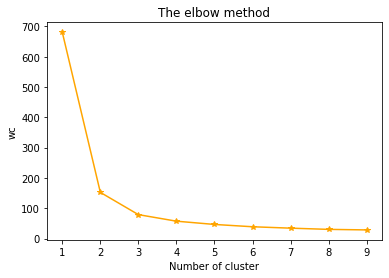

In [12]:
wc = []
n_cluster = range(1,10)
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(X)
    wc.append(kmeans.inertia_)
    
# Plotting the results on line graph
plt.plot(n_cluster, wc, c='orange', marker='*')
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("wc")
plt.show()

# Making Predictions

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
predictions = kmeans.fit_predict(X)

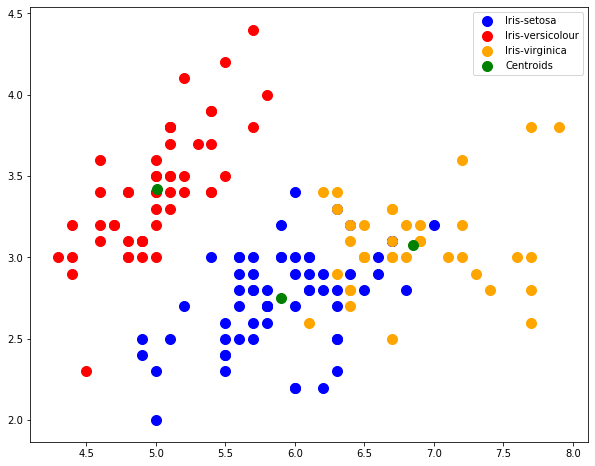

In [15]:
# blue dot = Iris-setosa
# red dot = Iris-versicolour
# orange dot = Iris-virginica

plt.figure(figsize=(10,8))

plt.scatter(X[predictions == 0,0],X[predictions == 0,1], s=100, c='blue', label='Iris-setosa')
plt.scatter(X[predictions == 1,0],X[predictions == 1,1], s=100, c='red', label='Iris-versicolour')
plt.scatter(X[predictions == 2,0],X[predictions == 2,1], s=100, c='orange', label='Iris-virginica')

# Plotting centroid of the clusters
# Green dots represent the centroid

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='green', label="Centroids")
plt.legend()
